# [PROJECT] 삼성전자 주가와 미국환율의 상관관계 시각화

## 프로젝트 목표
- 삼성전자 주가와 미국 환율(USD)의 상관관계를 시각화하여 분석

---

## 프로젝트 목차

1. **데이터 설치:** 파이썬 라이브러리 중 Finance-datareader 설치<br>


2. **데이터 추출:** <br>
    2.1. 한국거래소에 상장된 모든 종목 리스트 가져오기<br>
    2.2. 삼성전자 데이터만 추출하기<br>
    2.3. 원달러 환율 데이터 추출하기<br>
    
    
3. **데이터 병합:** 삼성전자 주가와 원달러 환율 데이터 병합<br>

  
4. **데이터 확인:** <br>
    4.1. 결측값 확인<br>
    4.2. 결측값 처리<br>


5. **프로젝트 목표 시각화:** 삼성전자 주가와 원달러 환율 관계 시각화<br>


6. **평가:** 피어슨 상관관계를 이용하여 결론 도출<br>

---

## 데이터 출처
- https://github.com/FinanceData/FinanceDataReader : FinanceData.KR 에서 만든 오픈소스 금융 데이터 수집기

---

## 1. **데이터 설치:** 파이썬 라이브러리 중 Finance-datareader 설치

In [115]:
!pip install finance-datareader

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [116]:
!pip install --upgrade finance-datareader

Requirement already up-to-date: finance-datareader in /opt/conda/lib/python3.6/site-packages (0.9.50)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [117]:
# matplotlib 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## 2. **데이터 추출:**

### 2.1 한국거래소에 상장된 모든 종목 리스트 가져오기

In [118]:
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Amount,Volume,Changes,ChagesRatio,ChangeCode,Name,ISU_CD,Code,Stocks,Marcap,MarketId,Market,Dept,Close,High,Low,Open
0,867629434400,14013030,200,0.32,1,삼성전자,KR7005930003,005930,5969782550,370126518100000,STK,KOSPI,,62000,62200,61300,62000
1,178828116000,302064,11000,1.87,1,LG에너지솔루션,KR7373220003,373220,234000000,140166000000000,STK,KOSPI,,599000,599000,581000,591000
2,230940914200,2612384,1500,1.71,1,SK하이닉스,KR7000660001,000660,728002365,64937810958000,STK,KOSPI,,89200,89200,86600,88100
3,57858745000,64551,-5000,-0.56,2,삼성바이오로직스,KR7207940008,207940,71174000,63700730000000,STK,KOSPI,,895000,904000,890000,900000
4,153527409544,209401,8000,1.10,1,삼성SDI,KR7006400006,006400,68764530,50748223140000,STK,KOSPI,,738000,738000,723000,730000


### 2.2. 삼성전자(005930) 데이터 불러오기

In [119]:
#삼성전자 Code 확인 후, 해당 코드로 2021년 1월 2일부터 날짜별 데이터 불러오기 (1월1일은 공휴일이라 제외)
SAMSUNG = fdr.DataReader('005930', '2021-01-02',)
SAMSUNG.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170


In [120]:
# 삼성전자의 종가를 기준으로 데이터 추출
SAMSUNG = fdr.DataReader('005930', '2021-01-02',)['Close']
SAMSUNG

Date
2021-01-04    83000
2021-01-05    83900
2021-01-06    82200
2021-01-07    82900
2021-01-08    88800
2021-01-11    91000
2021-01-12    90600
2021-01-13    89700
2021-01-14    89700
2021-01-15    88000
2021-01-18    85000
2021-01-19    87000
2021-01-20    87200
2021-01-21    88100
2021-01-22    86800
2021-01-25    89400
2021-01-26    86700
2021-01-27    85600
2021-01-28    83700
2021-01-29    82000
2021-02-01    83000
2021-02-02    84400
2021-02-03    84600
2021-02-04    82500
2021-02-05    83500
2021-02-08    83000
2021-02-09    82700
2021-02-10    81600
2021-02-15    84200
2021-02-16    84900
              ...  
2022-09-27    54200
2022-09-28    52900
2022-09-29    52600
2022-09-30    53100
2022-10-04    55200
2022-10-05    56000
2022-10-06    56300
2022-10-07    56200
2022-10-11    55400
2022-10-12    55800
2022-10-13    55200
2022-10-14    56300
2022-10-17    56600
2022-10-18    56500
2022-10-19    55800
2022-10-20    55500
2022-10-21    55900
2022-10-24    57500
2022-10-25    5

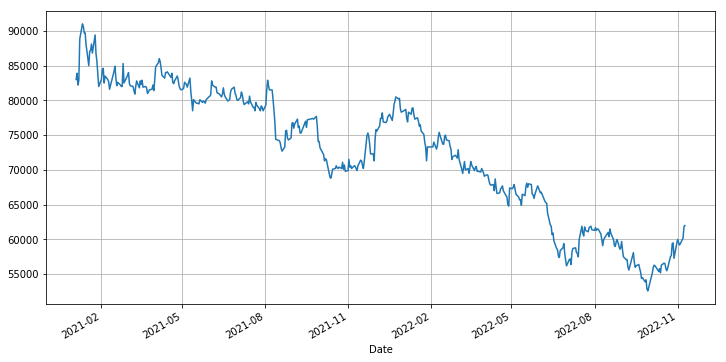

In [121]:
#삼성전자 주가 시각화
SAMSUNG.plot()

### 2.3. 원달러 환율 데이터 불러오기

In [122]:
# 원달러환율 데이터 추출

US_Exchange = fdr.DataReader('USD/KRW', '2021-01-02',)['Close']
US_Exchange

Date
2021-01-04    1084.729980
2021-01-05    1086.619995
2021-01-06    1086.449951
2021-01-07    1086.949951
2021-01-08    1093.069946
2021-01-11    1092.819946
2021-01-12    1096.449951
2021-01-13    1093.540039
2021-01-14    1097.109985
2021-01-15    1094.900024
2021-01-18    1102.959961
2021-01-19    1103.099976
2021-01-20    1100.989990
2021-01-21    1096.250000
2021-01-22    1099.900024
2021-01-25    1104.640015
2021-01-26    1101.729980
2021-01-27    1101.000000
2021-01-28    1107.500000
2021-01-29    1112.290039
2021-02-01    1117.430054
2021-02-02    1116.880005
2021-02-03    1113.609985
2021-02-04    1113.150024
2021-02-05    1119.130005
2021-02-08    1116.849976
2021-02-09    1116.329956
2021-02-10    1110.000000
2021-02-11    1103.979980
2021-02-12    1102.219971
                 ...     
2022-09-29    1421.949951
2022-09-30    1430.170044
2022-10-03    1439.229980
2022-10-04    1433.339966
2022-10-05    1416.530029
2022-10-06    1416.760010
2022-10-07    1408.449951
2022-10

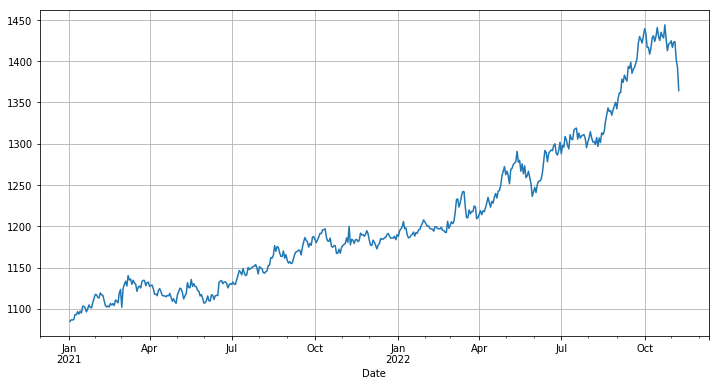

In [123]:
# 원달러환율 데이터 시각화
US_Exchange.plot()

## 3. **데이터 병합:** 삼성전자 주가와 원달러 환율 데이터 병합

In [124]:
data = [SAMSUNG, US_Exchange]
data

[Date
 2021-01-04    83000
 2021-01-05    83900
 2021-01-06    82200
 2021-01-07    82900
 2021-01-08    88800
 2021-01-11    91000
 2021-01-12    90600
 2021-01-13    89700
 2021-01-14    89700
 2021-01-15    88000
 2021-01-18    85000
 2021-01-19    87000
 2021-01-20    87200
 2021-01-21    88100
 2021-01-22    86800
 2021-01-25    89400
 2021-01-26    86700
 2021-01-27    85600
 2021-01-28    83700
 2021-01-29    82000
 2021-02-01    83000
 2021-02-02    84400
 2021-02-03    84600
 2021-02-04    82500
 2021-02-05    83500
 2021-02-08    83000
 2021-02-09    82700
 2021-02-10    81600
 2021-02-15    84200
 2021-02-16    84900
               ...  
 2022-09-27    54200
 2022-09-28    52900
 2022-09-29    52600
 2022-09-30    53100
 2022-10-04    55200
 2022-10-05    56000
 2022-10-06    56300
 2022-10-07    56200
 2022-10-11    55400
 2022-10-12    55800
 2022-10-13    55200
 2022-10-14    56300
 2022-10-17    56600
 2022-10-18    56500
 2022-10-19    55800
 2022-10-20    55500
 2022-1

In [125]:
# 열 기준으로 데이터 합치기
import pandas as pd
df = pd.concat(data, axis=1)
df.tail()

,Close,Close
Date,,
2022-11-03,59200.0,1423.099976
2022-11-04,59400.0,1423.650024
2022-11-07,60200.0,1402.109985
2022-11-08,61800.0,1392.699951
2022-11-09,62000.0,1364.300049


In [126]:
#Column명 변경
df.columns = ['SAMSUNG', 'WON/USD']
df.tail()

,SAMSUNG,WON/USD
Date,,
2022-11-03,59200.0,1423.099976
2022-11-04,59400.0,1423.650024
2022-11-07,60200.0,1402.109985
2022-11-08,61800.0,1392.699951
2022-11-09,62000.0,1364.300049


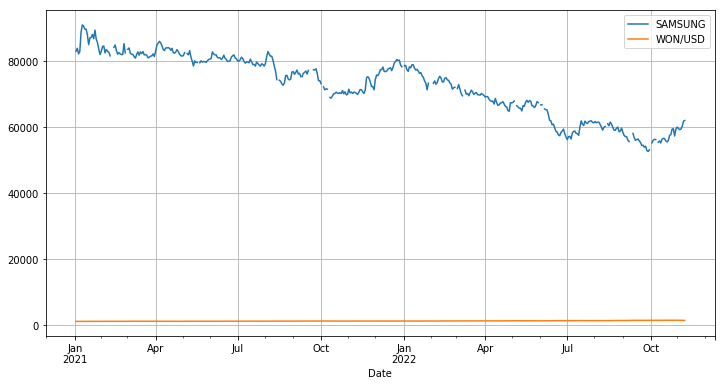

In [127]:
#병합된 데이터 시각화
df.plot()

## 4. 데이터 확인 및 처리

### 4.1. 결측값 확인

In [141]:
# 데이터 결측치 갯수 확인하기
df.isnull().sum()

SAMSUNG    25
WON/USD     0
dtype: int64

### 4.2. 결측값 처리

In [154]:
# fillna함수를 이용하여 결측치 채우기
# 뒤의 결측지를 앞의 값으로 채우기 위해 method='ffill'를 이용
df.fillna(method='ffill')

,SAMSUNG,WON/USD
Date,,
2021-01-04,83000.0,1084.729980
2021-01-05,83900.0,1086.619995
2021-01-06,82200.0,1086.449951
2021-01-07,82900.0,1086.949951
2021-01-08,88800.0,1093.069946
2021-01-11,91000.0,1092.819946
2021-01-12,90600.0,1096.449951
2021-01-13,89700.0,1093.540039
2021-01-14,89700.0,1097.109985


## 5. **프로젝트 목표 시각화:** 삼성전자 주가와 원달러 환율 관계 시각화

          SAMSUNG   WON/USD
SAMSUNG  1.000000 -0.944618
WON/USD -0.944618  1.000000


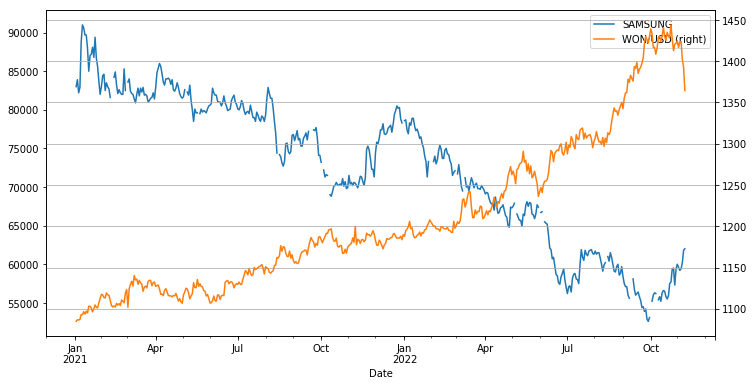

In [162]:
#우측 Y축 생성 (원달러환율 값)
df[['SAMSUNG', 'WON/USD']].plot(secondary_y=['WON/USD'])
print(df.corr(method='pearson'))

## 6. **평가:** 피어슨 상관관계를 이용하여 결론 도출

In [163]:
print(df.corr(method='pearson'))

          SAMSUNG   WON/USD
SAMSUNG  1.000000 -0.944618
WON/USD -0.944618  1.000000


삼성전자의 주가는 환율의 반비례한다.